# MScFE 690 Capstone 

### Group 4854

The purpose of this project including accompanying report is examine the statistical properties of the financial markets both before and during the Coronavirus period. We examine the basic descriptive statistics of major indices and complete a time series analysis. We will also examine regime detection and how this can be used to highlight a change in the market. Furthermore, we will illustrate how correlation structures of well known assets and volatility during the Coronavirus period. We explore the period 2017 up to the start of 2020 and the period 2020 to the present day.  

### Descriptive Statistics 

##### Some basic statistics to do with the S&P 500

In [26]:
#### 
import yfinance as yf
import numpy as np
sp500 = yf.download('^GSPC','2017-01-01', '2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [27]:
mean = np.mean(sp500['Adj Close'])
mean


2703.161457577814

In [28]:
import statistics 
mode = statistics.mode(sp500['Adj Close'])
mode

2268.89990234375

In [29]:
median = np.median(sp500['Adj Close']) 
median

2723.530029296875

In [30]:
sp500['Adj Close'].describe()


count     754.000000
mean     2703.161458
std       227.623908
min      2257.830078
25%      2502.632507
50%      2723.530029
75%      2879.137390
max      3240.020020
Name: Adj Close, dtype: float64

#####  Some basic statistics to do with the FTSE 100

In [31]:
#### 
import yfinance as yf
import numpy as np
ftse100 = yf.download('^FTSE','2017-01-01', '2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [32]:
mean = np.mean(ftse100['Adj Close'])
mean


7339.696432068355

In [33]:
import statistics 
mode = statistics.mode(ftse100['Adj Close'])
mode

7189.7001953125

In [34]:
median = np.median(ftse100['Adj Close']) 
median

7348.75

In [35]:
ftse100['Adj Close'].describe()

count     758.000000
mean     7339.696432
std       222.832171
min      6584.700195
25%      7203.225098
50%      7348.750000
75%      7502.025146
max      7877.500000
Name: Adj Close, dtype: float64

#####  Some basic statistics to do with the Gold

In [36]:
gold = yf.download('GC=F','2017-01-01', '2020-01-01')
mean = np.mean(gold['Adj Close'])
mean


[*********************100%***********************]  1 of 1 completed


1306.1725101546938

In [37]:
#### Calculating Mode 

import statistics 
mode = statistics.mode(gold['Adj Close'])
mode

1254.300048828125

In [38]:
median = np.median(gold['Adj Close']) 
median

1285.5

In [39]:
gold['Adj Close'].describe()

count     753.000000
mean     1306.172510
std        89.609492
min      1160.400024
25%      1245.199951
50%      1285.500000
75%      1330.000000
max      1550.300049
Name: Adj Close, dtype: float64

#####  Some basic statistics to do with the Crude Oil

In [40]:
#### 
import yfinance as yf
import numpy as np
oil = yf.download('CL=F','2017-01-01', '2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [41]:
mean = np.mean(oil['Adj Close'])
mean

57.61342182715945

In [42]:
import statistics 
mode = statistics.mode(oil['Adj Close'])
mode

61.68000030517578

In [43]:
median = np.median(oil['Adj Close']) 
median

56.69999885559082

In [44]:
oil['Adj Close'].describe()

count    754.000000
mean      57.613422
std        7.596221
min       42.529999
25%       52.080000
50%       56.699999
75%       63.414999
max       76.410004
Name: Adj Close, dtype: float64

#####  Some basic statistics to do with the Bitcoin (BTC-USD) 

In [45]:
#### 
import yfinance as yf
import numpy as np
bitcoin = yf.download('BTC-USD','2017-01-01', '2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [46]:
mean = np.mean(bitcoin['Adj Close'])
mean

6325.325234573253

In [47]:
import statistics 
mode = statistics.mode(bitcoin['Adj Close'])
mode

1179.969970703125

In [48]:
median = np.median(bitcoin['Adj Close']) 
median

6481.364990234375

In [49]:
bitcoin['Adj Close'].describe()

count     1096.000000
mean      6325.325235
std       3531.775079
min        777.757019
25%       3673.178040
50%       6481.364990
75%       8428.574707
max      19497.400391
Name: Adj Close, dtype: float64

#####  Some basic statistics to do with the 10 YR US Treasuries (TLT)

In [50]:
#### 
import yfinance as yf
import numpy as np
bond = yf.download('TLT','2017-01-01', '2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [51]:
mean = np.mean(bond['Adj Close'])
mean

109.92834441288713

In [52]:
import statistics 
mode = statistics.mode(bond['Adj Close'])
mode

101.7562484741211

In [53]:
median = np.median(bond['Adj Close']) 
median

107.40604782104492

In [54]:
bond['Adj Close'].describe()

count    754.000000
mean     109.928344
std        8.386847
min       99.118416
25%      104.247091
50%      107.406048
75%      110.986008
max      133.833862
Name: Adj Close, dtype: float64

### Further explaratory data analysis 

In [ ]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def get_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data['Close']

# Fetch S&P 500 data from Yahoo Finance
sp500_data = get_stock_data('SPY', '2017-01-01', '2020-01-01')

# Calculate statistics
mean = sp500_data.mean()
median = sp500_data.median()
mode = sp500_data.mode()[0]  # Mode can have multiple values, so we take the first one
range_val = sp500_data.max() - sp500_data.min()
skewness = stats.skew(sp500_data)

# Print the calculated statistics
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Range: {range_val}")
print(f"Skewness: {skewness}")

# Plotting the data
plt.figure(figsize=(12, 6))
sns.histplot(sp500_data, kde=True)
plt.title('S&P 500 Closing Prices Distribution for data 01-01-2017 to 01-01-2021')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

# Displaying the data table
print(sp500_data)


# Fetch FTSE data from Yahoo Finance
ftse_data = get_stock_data('^FTSE', '2017-01-01', '2021-01-01')

# Calculate statistics
mean = ftse_data.mean()
median = ftse_data.median()
mode = ftse_data.mode()[0]  # Mode can have multiple values, so we take the first one
range_val = ftse_data.max() - ftse_data.min()
skewness = stats.skew(ftse_data)

# Print the calculated statistics
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Range: {range_val}")
print(f"Skewness: {skewness}")

# Plotting the data
plt.figure(figsize=(12, 6))
sns.histplot(ftse_data, kde=True)
plt.title('FTSE Closing Prices Distribution for data 01-01-2017 to 01-01-2021')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

# Displaying the data table
print(ftse_data)



# Fetch Gold data from Yahoo Finance
gold_data = get_stock_data('GC=F', '2017-01-01', '2021-01-01')

# Calculate statistics
mean = gold_data.mean()
median = gold_data.median()
mode = gold_data.mode()[0]  # Mode can have multiple values, so we take the first one
range_val = gold_data.max() - gold_data.min()
skewness = stats.skew(gold_data)

# Print the calculated statistics
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Range: {range_val}")
print(f"Skewness: {skewness}")

# Plotting the data
plt.figure(figsize=(12, 6))
sns.histplot(ftse_data, kde=True)
plt.title('Gold Closing Prices Distribution for data 01-01-2017 to 01-01-2021')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

# Displaying the data table
print(gold_data)

# Fetch Crude Oil data from Yahoo Finance
crudeoil_data = get_stock_data('CL=F', '2017-01-01', '2021-01-01')

# Calculate statistics
mean = crudeoil_data.mean()
median = crudeoil_data.median()
mode = crudeoil_data.mode()[0]  # Mode can have multiple values, so we take the first one
range_val = crudeoil_data.max() - crudeoil_data.min()
skewness = stats.skew(crudeoil_data)

# Print the calculated statistics
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Range: {range_val}")
print(f"Skewness: {skewness}")

# Plotting the data
plt.figure(figsize=(12, 6))
sns.histplot(crudeoil_data, kde=True)
plt.title('Crude Oil Closing Prices Distribution for data 01-01-2017 to 01-01-2021')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

# Displaying the data table
print(crudeoil_data)


# Fetch Bitcoin data from Yahoo Finance
bitcoin_data = get_stock_data('BTC-USD', '2017-01-01', '2021-01-01')

# Calculate statistics
mean = bitcoin_data.mean()
median = bitcoin_data.median()
mode = bitcoin_data.mode()[0]  # Mode can have multiple values, so we take the first one
range_val = bitcoin_data.max() - bitcoin_data.min()
skewness = stats.skew(bitcoin_data)

# Print the calculated statistics
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Range: {range_val}")
print(f"Skewness: {skewness}")

# Plotting the data
plt.figure(figsize=(12, 6))
sns.histplot(crudeoil_data, kde=True)
plt.title('Bitcoin Closing Prices Distribution for data 01-01-2017 to 01-01-2021')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

# Displaying the data table
print(bitcoin_data)



# Fetch Bitcoin data from Yahoo Finance
tlt_data = get_stock_data('TLT', '2017-01-01', '2021-01-01')

# Calculate statistics
mean = tlt_data.mean()
median = tlt_data.median()
mode = tlt_data.mode()[0]  # Mode can have multiple values, so we take the first one
range_val = tlt_data.max() - tlt_data.min()
skewness = stats.skew(tlt_data)

# Print the calculated statistics
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Range: {range_val}")
print(f"Skewness: {skewness}")

# Plotting the data
plt.figure(figsize=(12, 6))
sns.histplot(crudeoil_data, kde=True)
plt.title('US Treasury 10Y ETF Closing Prices Distribution for data 01-01-2017 to 01-01-2021')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

# Displaying the data table
print(tlt_data)

#### Investigating the statistical properties of financial markets 

In [ ]:
!pip install yfinance    # Install Yahoo Fianace package
import yfinance as yf 
import pandas as pd
from statsmodels.graphics import tsaplots 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def download(stock):  
    """
    Download the stock historical data.

    Parameters
    ----------
    stock: str
      Stock symbol.

    Returns
    -------
    DataFrame
      Downloaded stock historical data.
    """


    df = yf.download(
         [stock],
         start="2017-01-01",
         end="2020-01-01",
         group_by="ticker",
         progress=False)
            
    df = df.round(4)
    df.insert(loc=0, column='Company', value=stock) 
    return df


# Download S&P 500 dataframe
df_GSPC = download('^GSPC')  
# Download FTSE 100 dataframe      
df_FTSE = download('^FTSE')   
# Download Gold dataframe    
df_GCF = download('GC=F')     
# Download Crude oil dataframe 
df_CLF = download('CL=F')    
# Download Bitcoin dataframe        
df_BTC = download('BTC-USD')    
# Download 20 year treasury bond ETF dataframe        
df_TLT = download('TLT')  

stock_list={'S&P': df_GSPC, 'FTSE': df_FTSE, 'Gold': df_GCF, 'Crude': df_CLF, 'Bitcoin': df_BTC, 'TLT': df_TLT}

In [ ]:
def info(stock, df):
    """
    Print the summary information of each stock.

    Parameters
    ----------
    stock: str
      Stock company name.
    df: DataFrame
      Stock's dataframe.

    Returns
    -------
    None.
    """

    print(f'{stock}\'s Historical Data: \n\n {df} \n\n')
    print(f'{stock}\'s Column Information: \n')
    print(df.info(),'\n\n')
    print(f'{stock}\'s Statistic Summary: \n\n {df.describe().round(4)}')
    print('-'*75)
    print()


print(info('S&P', df_GSPC))
print(info('FTSE', df_FTSE))
print(info('Gold', df_GCF))
print(info('Crude Oil', df_CLF))
print(info('Bitcoin', df_BTC))
print(info('TLT', df_TLT))

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(20,15))
fig.delaxes(ax[1,2])
fontsize = 15

# S&P 500
ax[0,0].plot(df_GSPC['Adj Close'])
ax[0,0].set_title('S&P 500', fontsize=fontsize)
ax[0,0].set_xlabel('Date', fontsize=fontsize)
ax[0,0].set_ylabel('Price($)', fontsize=fontsize)

# FTSE 100
ax[0,1].plot(df_FTSE['Adj Close'])
ax[0,1].set_title('FTSE 100', fontsize=fontsize)
ax[0,1].set_xlabel('Date', fontsize=fontsize)
ax[0,1].set_ylabel('Price($)', fontsize=fontsize)

# Gold
ax[0,2].plot(df_GCF['Adj Close'])
ax[0,2].set_title('Gold', fontsize=fontsize)
ax[0,2].set_xlabel('Date', fontsize=fontsize)
ax[0,2].set_ylabel('Price($)', fontsize=fontsize)

# Crude oil
ax[1,0].plot(df_CLF['Adj Close'])
ax[1,0].set_title('Crude Oil', fontsize=fontsize)
ax[1,0].set_xlabel('Date', fontsize=fontsize)
ax[1,0].set_ylabel('Price($)', fontsize=fontsize)

# Bitcoin
ax[1,1].plot(df_BTC['Adj Close'])
ax[1,1].set_title('Bitcoin', fontsize=fontsize)
ax[1,1].set_xlabel('Date', fontsize=fontsize)
ax[1,1].set_ylabel('Price($)', fontsize=fontsize)

# 20 Year Treasury Bond ETF
ax[1,2].plot(df_TLT['Adj Close'])
ax[1,2].set_title('20 Yr Bond ETF', fontsize=fontsize)
ax[1,2].set_xlabel('Date', fontsize=fontsize)
ax[1,2].set_ylabel('Price($)', fontsize=fontsize)

plt.suptitle('Adjusted Close Price', fontsize=25, fontweight='bold', x=0.5, y=0.94)
plt.show()

In [ ]:
def boxplot(stock, company):
    """
    Plot the boxplot of adjusted close price.

    Parameters
    ----------
    stock: DataFrame
      Stock's DataFrame.
    company: str
      Company name.

    Returns
    -------
    None.
    """

    plt.figure(figsize=(8,6))
    plt.boxplot(stock['Adj Close'])
    plt.ylabel('Price($)')
    plt.title(f'{company}\'s Adjusted Close Price', fontsize=15)
    plt.show()
  
  
for company, stock in stock_list.items():
    print(boxplot(stock, company),'\n')

In [ ]:
def scatter_matrix(stock, company):
    """
    Plot the scatter matrix.

    Parameters
    ----------
    stock: DataFrame
      Stock's DataFrame.
    company: str
      Company name.
  
    Returns
    -------
    None.
    """

    pd.plotting.scatter_matrix(stock, figsize=(8,8), alpha=0.3)
    plt.suptitle(f'Pairwise Scatter Plot of {company}', x=0.5, y=0.92)
    plt.show()


for company, stock in stock_list.items():
    print(scatter_matrix(stock, company),'\n')

In [ ]:
def heatmap(stock, company):
    """
    Plot the correlation heatmap.

    Parameters
    ----------
    stock: DataFrame
      Stock's DataFrame.
    company: str
      Company name.

    Returns
    -------
    None.
    """

    plt.figure(figsize = (8,8))
    sns.heatmap(stock.corr(), cmap='GnBu', annot=True, linewidths = 1, fmt='f').set_title(f'Correlation Heatmap of {company}', fontsize=15)
    plt.xticks(rotation=30, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.show()
  
  
for company, stock in stock_list.items():
    print(heatmap(stock, company),'\n')

In [ ]:
def autocorrelation(stock, company):
    """
    Plot the autocorrelation of stocks based on adjusted close price.
 
    Parameters
    ----------
    stock: DataFrame
      Stock's DataFrame.
    company: str
      Company name.

    Returns
    -------
    None
    """

    tsaplots.plot_acf(stock["Adj Close"], lags=50)  
    plt.title(f'Autocorrelation of {company}\'s Adjusted Close Price', fontsize=13)
    plt.xlabel('Lags (Days)', fontsize=10)
    plt.ylabel('Correlation', fontsize=10)
    plt.show()


for company, stock in stock_list.items():
    print(autocorrelation(stock, company),'\n')

### Kurtosis 

The distribution of asset returns are often not in line with the normal distribution and often display positive excess kurtosis.We can capture and estimate the tail risk using a leptokurtic distribution such as the student's t distribution. The student's t distribution is symmetric, however it has a fatter tail. which is symmetric like the normal distribution but has fatter tails.

In [ ]:
# standard imports
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Generating random data from the three distributions
mesokurtic = np.random.normal(0,1,10000)
platykurtic = np.random.uniform(-2,2,10000)
leptokurtic = np.random.laplace(0,1,10000)

# putting the data in a DataFrame and standardizing
df = pd.DataFrame({'mesokurtic_Normal':mesokurtic,'platykurtic_Uniform':platykurtic,'leptokurtic_Laplace':leptokurtic})
df = (df - df.mean())/df.std()

# plotting the three distributions 
sns.set(rc={'figure.figsize':(12,7)})
sns.distplot(df['mesokurtic_Normal'], color='blue', label='mesokurtic: Standard Normal',hist=False)
sns.distplot(df['platykurtic_Uniform'], color='red', label='platykurtic: Uniform',hist=False)
sns.distplot(df['leptokurtic_Laplace'], color='green', label='leptokurtic: Laplace',hist=False)
plt.title('Mesokurtic, Platykurtic and Leptokurtic Distributions', fontsize=15)
plt.xlabel('Standardized Values')
plt.ylabel('PDF')
plt.legend();
plt.show();

In [ ]:
results = pd.DataFrame({'MEAN': df.mean().round(2),'STANDARD DEVIATION':df.std().round(2),\
                        'SKEWNESS':df.skew().round(0),'EXCESS KURTOSIS':df.kurtosis().round(0) })
results

In [ ]:
# Fetching past five years of daily return data for S&P 500 Spyder ETF
end = dt.datetime.today()
start = end - dt.timedelta(days=252*5)
df = yf.download(['^GSPC'],start,end,progress=False)[['Adj Close']].pct_change()
df.columns=['^GSPC']

# Generating random data from Normal and t distributions for the same period
df['normal'] = np.random.standard_normal(len(df))
df['t'] = t = np.random.standard_t(3.8,len(df))

# Standardizing the distributions
df = (df - df.mean())/df.std()

# plotting the three distributions 
sns.set(rc={'figure.figsize':(12,7)})
sns.distplot(df['^GSPC'], color='green', label="S&P 500",hist=False)
sns.distplot(df['normal'], color='blue', label='Normal',hist=False)
sns.distplot(df['t'], color='red', label="Student's t",hist=False)

plt.title("Normal vs Student's t",fontsize=15)
plt.xlabel('Standardized Values')
plt.ylabel('PDF')
plt.legend();
plt.show();

In [ ]:
# getting return data for S&P 500 and the FTSE 100 
start = dt.datetime(2017,1,1).date()
end = dt.datetime(2020,12,31).date()

tickers=['^GSPC','^FTSE','GC=F']
DF =pd.DataFrame()

for i in tickers:
    df = yf.download(i,start,end,progress=False)[['Adj Close']].pct_change()
    df.columns = [i]                         
    DF = pd.concat([DF,df],axis =1)

DF.dropna(inplace=True)

# Checking the mean and standard deviations
print(DF.describe().round(3)[1:3])

# plotting the S&P 500 returns with the bitcoin returns
DF.plot(figsize=(12,7))
plt.title('SPY vs BTC daily returns', fontsize=15)
plt.show();

In [ ]:
# plotting the distributions S&P 500, FTSE 100, and Gold Returns
sns.set(rc={'figure.figsize':(12,7)})
sns.distplot(DF['^GSPC'], color='blue',rug=False,hist=False, label='S&P 500')
sns.distplot(DF['^FTSE'], color='red',rug=False,hist=False, label='FTSE 100')
sns.distplot(DF['GC=F'], color='green',rug=False,hist=False, label='Gold returns')
plt.title('Distributions of S&P 500 vs FTSE 100 vs Gold daily returns',fontsize=15);
plt.legend()
plt.show();

In [ ]:
# Calculating the excess kurtosis
DF.kurtosis().round(0)

In [ ]:
DF = (DF- DF.mean())/ DF.std()

# Creating samples from a standard normal distribution for comparison
DF['Standard_Normal'] = np.random.normal(0,1,DF.shape[0])

# Checking the mean and standard deviation of standardized variables
DF.describe().round(1)[1:3]

print('Excess Kurtosis:\n',DF.kurtosis().round(0))

In [ ]:
# Plotting the returns 
DF.plot(figsize=(12,7));
plt.title('Standardized daily returns', fontsize=15)

In [ ]:
# plotting the three distributions 
sns.set(rc={'figure.figsize':(12,7)})
sns.distplot(DF['^GSPC'], color='blue',rug=True,hist=False, label=' S&P 500')
sns.distplot(DF['^FTSE'], color='red',rug=True,hist=False, label='FTSE 100')
sns.distplot(DF['GC=F'], color='magenta',rug=True,hist=False, label='Gold')
sns.distplot(DF['Standard_Normal'], color='green',rug=True,hist=False, label='Standard_Normal')
plt.title('Distributions of S&P 500, FTSE 100, Gold and Standard Normal returns',fontsize=15);
plt.legend()
plt.show();

### Calculating  Returns 

In [ ]:
pip install mplfinance

In [ ]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from plotly import express as px
import datetime as dt
import os

pd.options.display.float_format = '{:,.3f}'.format
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:,.3f}'.format

stocknames = ['^GSPC', '^FTSE', 'GC=F','CL=F','BTC-USD','TLT']    #ticker
startdate = '2017-01-01'
enddate = '2023-12-31'
# enddate =   dt.datetime.now().date()    #change to current day date if required
interval = '1d'

In [ ]:
for stock in stocknames:
    df = yf.download(stock, interval=interval, period='max')
    df.to_csv('stocks_data\\{}.csv'.format(stock))

In [ ]:
def appending(cols=[], startdate='', enddate=''):
    '''append stocks data into one file and then select the 'Adj Close' column'''
    dates = pd.date_range(start=startdate, end=enddate)
    df = pd.DataFrame(index=dates)
    for stock in stocknames:
        df_stock = pd.read_csv('stocks_data\\{}.csv'.format(stock), index_col='Date', parse_dates=True, usecols=cols, na_values=['NaN'])
        df_stock = df_stock.rename(columns = {'Adj Close': stock})
        df = df.join(df_stock)
        df = df.loc[dates]
    df.index.names = ['Date']
    df = df.dropna()    #there are other ways to handle missing values. For simplicity, drop them for now
    return df

df = appending(['Date', 'Adj Close'], startdate, enddate)
print(df)

In [ ]:
df_desc = df.describe().T
df_desc[['count', 'mean', 'std', 'min', '50%', 'max']]

In [ ]:
from plotly import express as px

px.line(data_frame=df, title='Tickers Adj. Close Prices', width=1000, height=500)

In [ ]:
df.head()

In [ ]:
norm = df / df.iloc[0,:]
norm.head()

In [ ]:
fig = px.line(norm, x=norm.index, y=['^GSPC', '^FTSE', 'GC=F','CL=F','TLT'])
fig.update_layout(title='Stock movement observation by normalizing Adj close prices, (Daily Cumulative Return)',
                  xaxis_title='Date',
                  yaxis_title='Normalized price')
fig.show()

In [ ]:
from matplotlib import pyplot as plt

norm.plot(figsize=(18, 4.5))
plt.grid(alpha=0.6)
plt.title('Normalization plot using matplotlib')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.tight_layout()

In [ ]:
rollingmean = df['^GSPC'].rolling(50).mean()
rollingstd = df['^GSPC'].rolling(50).std()
lowerbound = rollingmean - (2 * rollingstd)
upperbound = rollingmean + (2 * rollingstd)
fig, ax = plt.subplots(figsize=(15,4))
df.iloc[50:]['^GSPC'].plot(ax=ax, color='green')
ax.set_title('S&P 500 Bollinger Bands Indicator\n')
ax.set_xlabel('Date')
ax.set_ylabel('\nStock Price\n')
rollingmean.plot(ax=ax, linestyle='-', color='grey')
lowerbound.plot(ax=ax, linestyle='--', color='grey')
upperbound.plot(ax=ax, linestyle='--', color='grey')
plt.grid(alpha=0.25)
plt.tight_layout()


rollingmean = df['^FTSE'].rolling(50).mean()
rollingstd = df['^FTSE'].rolling(50).std()
lowerbound = rollingmean - (2 * rollingstd)
upperbound = rollingmean + (2 * rollingstd)
fig, ax = plt.subplots(figsize=(15,4))
df.iloc[50:]['^FTSE'].plot(ax=ax, color='red')
ax.set_title('FTSE 100 Bollinger Bands Indicator\n')
ax.set_xlabel('Date')
ax.set_ylabel('\nStock Price\n')
rollingmean.plot(ax=ax, linestyle='-', color='grey')
lowerbound.plot(ax=ax, linestyle='--', color='grey')
upperbound.plot(ax=ax, linestyle='--', color='grey')
plt.grid(alpha=0.25)
plt.tight_layout()

rollingmean = df['CL=F'].rolling(50).mean()
rollingstd = df['CL=F'].rolling(50).std()
lowerbound = rollingmean - (2 * rollingstd)
upperbound = rollingmean + (2 * rollingstd)
fig, ax = plt.subplots(figsize=(15,4))
df.iloc[50:]['CL=F'].plot(ax=ax, color='blue')
ax.set_title('Crude Oil Bollinger Bands Indicator\n')
ax.set_xlabel('Date')
ax.set_ylabel('\nStock Price\n')
rollingmean.plot(ax=ax, linestyle='-', color='grey')
lowerbound.plot(ax=ax, linestyle='--', color='grey')
upperbound.plot(ax=ax, linestyle='--', color='grey')
plt.grid(alpha=0.25)
plt.tight_layout()


rollingmean = df['GC=F'].rolling(50).mean()
rollingstd = df['GC=F'].rolling(50).std()
lowerbound = rollingmean - (2 * rollingstd)
upperbound = rollingmean + (2 * rollingstd)
fig, ax = plt.subplots(figsize=(15,4))
df.iloc[50:]['GC=F'].plot(ax=ax, color='magenta')
ax.set_title('Gold Bollinger Bands Indicator\n')
ax.set_xlabel('Date')
ax.set_ylabel('\nStock Price\n')
rollingmean.plot(ax=ax, linestyle='-', color='grey')
lowerbound.plot(ax=ax, linestyle='--', color='grey')
upperbound.plot(ax=ax, linestyle='--', color='grey')
plt.grid(alpha=0.25)
plt.tight_layout()


rollingmean = df['BTC-USD'].rolling(50).mean()
rollingstd = df['BTC-USD'].rolling(50).std()
lowerbound = rollingmean - (2 * rollingstd)
upperbound = rollingmean + (2 * rollingstd)
fig, ax = plt.subplots(figsize=(15,4))
df.iloc[50:]['BTC-USD'].plot(ax=ax, color='orange')
ax.set_title('Bitcoin USD Bollinger Bands Indicator\n')
ax.set_xlabel('Date')
ax.set_ylabel('\nStock Price\n')
rollingmean.plot(ax=ax, linestyle='-', color='grey')
lowerbound.plot(ax=ax, linestyle='--', color='grey')
upperbound.plot(ax=ax, linestyle='--', color='grey')
plt.grid(alpha=0.25)
plt.tight_layout()

rollingmean = df['TLT'].rolling(50).mean()
rollingstd = df['TLT'].rolling(50).std()
lowerbound = rollingmean - (2 * rollingstd)
upperbound = rollingmean + (2 * rollingstd)
fig, ax = plt.subplots(figsize=(15,4))
df.iloc[50:]['TLT'].plot(ax=ax, color='deepskyblue')
ax.set_title('US 10 Year Treasury ETF Bollinger Bands Indicator\n')
ax.set_xlabel('Date')
ax.set_ylabel('\nStock Price\n')
rollingmean.plot(ax=ax, linestyle='-', color='grey')
lowerbound.plot(ax=ax, linestyle='--', color='grey')
upperbound.plot(ax=ax, linestyle='--', color='grey')
plt.grid(alpha=0.25)
plt.tight_layout()

#### Further Analysis

In [ ]:
conda install -c conda-forge imbalanced-learn

In [ ]:
!pip install imblearn


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def fetch_data(ticker, start_date, end_date):
    """
    Fetch historical data for a given ticker from Yahoo Finance.
    
    Parameters:
    ticker (str): The ticker symbol of the asset.
    start_date (str): Start date in 'YYYY-MM-DD' format.
    end_date (str): End date in 'YYYY-MM-DD' format.
    
    Returns:
    DataFrame: A pandas DataFrame with historical data for the asset.
    """
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

def calculate_volatility(data):
    """
    Calculate daily returns and volatility of the asset.
    
    Parameters:
    data (DataFrame): Historical data of the asset.
    
    Returns:
    float: The volatility of the asset.
    """
    data['Daily Returns'] = data['Adj Close'].pct_change()
    volatility = data['Daily Returns'].std() * (252 ** 0.5)  # Annualizing volatility
    return volatility

def plot_data(data, title):
    """
    Plot the adjusted close price and daily returns of the asset.
    
    Parameters:
    data (DataFrame): Historical data of the asset.
    title (str): The title of the plot.
    """
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Adj Close', color=color)
    ax1.plot(data.index, data['Adj Close'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Daily Returns', color=color)
    ax2.plot(data.index, data['Daily Returns'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title(title)
    plt.show()

# Define the assets and the time period
assets = ['^GSPC', '^FTSE', 'GC=F', 'CL=F', 'BTC-USD', 'TLT']
asset_names = ['S&P 500', 'FTSE 100', 'Gold', 'Crude Oil', 'Bitcoin', 'US 10YR Treasury ETF']
start_date = '2020-01-01'
end_date = '2020-12-31'

# Fetch data, calculate volatility, and plot for each asset
volatilities = []
for ticker, name in zip(assets, asset_names):
    print(f"Fetching data for {name}...")
    data = fetch_data(ticker, start_date, end_date)
    volatility = calculate_volatility(data)
    volatilities.append(volatility)
    plot_data(data, f"{name} Adjusted Close and Daily Returns")
    print(f"{name} Volatility: {volatility}\n")

# Display the volatilities in a table
volatility_table = pd.DataFrame({'Asset': asset_names, 'Volatility': volatilities})
print("Volatility Table:")
print(volatility_table)

#### Further graphical illustrations of EDA 

In [ ]:
# Import necessary libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the assets to fetch data for
assets = ['^GSPC', '^FTSE', 'GC=F', 'CL=F', 'BTC-USD', 'TLT']

# Fetch data from Yahoo Finance for the specified period
start_date = '2017-01-01'
end_date = '2020-04-01'

data = {}
for asset in assets:
    data[asset] = yf.download(asset, start=start_date, end=end_date)

# Plot graphs, charts, and diagrams for each asset
for asset, df in data.items():
    # Plot price change over time
    plt.figure(figsize=(10, 6))
    plt.plot(df['Close'])
    plt.title(f'{asset} Price Change Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid()
    plt.show()

    # Plot distribution of prices
    plt.figure(figsize=(10, 6))
    df['Close'].plot(kind='hist', bins=30)
    plt.title(f'{asset} Price Distribution')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

    # Calculate and plot volatility
    df['Volatility'] = df['Close'].pct_change().rolling(window=30).std()
    plt.figure(figsize=(10, 6))
    plt.plot(df['Volatility'])
    plt.title(f'{asset} Volatility Over Time')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.grid()
    plt.show()

    # Calculate and plot returns
    df['Return'] = df['Close'].pct_change()
    plt.figure(figsize=(10, 6))
    plt.plot(df['Return'])
    plt.title(f'{asset} Returns Over Time')
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.grid()
    plt.show()

### Regime Detection

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
import pandas as pd
import random

import numpy as np
import scipy.stats as scs

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from collections import Counter, deque
from imblearn.under_sampling import RandomUnderSampler

In [14]:
df = yf.download('^GSPC', start="2020-01-01", end="2020-12-31", interval="1d")
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3459930000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3484700000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3702460000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3435910000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3726840000


In [15]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,3693.419922,3711.239990,3689.280029,3690.010010,3690.010010,3779160000
2020-12-24,3694.030029,3703.820068,3689.320068,3703.060059,3703.060059,1883780000
2020-12-28,3723.030029,3740.510010,3723.030029,3735.360107,3735.360107,3535460000
2020-12-29,3750.010010,3756.120117,3723.310059,3727.040039,3727.040039,3393290000
2020-12-30,3736.189941,3744.629883,3730.209961,3732.040039,3732.040039,3154850000


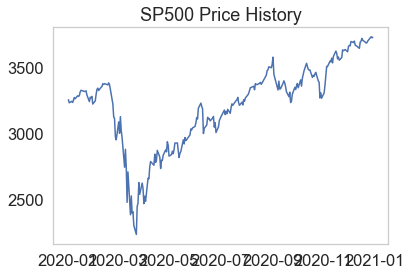

In [16]:
plt.title(f'SP500 Price History')
plt.plot(
    list(i for i in df.index),
    list(i[4] for i in df.values))
plt.grid(False)


<AxesSubplot:title={'center':'Excess returns'}, xlabel='Date'>

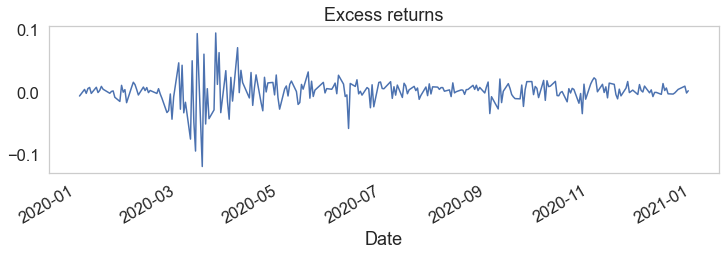

In [17]:
df['r-1'] = df['Adj Close'].pct_change().dropna()

ex_ret = df['r-1']
ex_ret.plot(title='Excess returns', figsize=(12, 3), grid=False)

In [18]:
# Fit the model
mod_kns = sm.tsa.MarkovRegression(ex_ret.dropna(), k_regimes=2, trend='n', switching_variance=True)
res_kns = mod_kns.fit()
res_kns.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                    r-1   No. Observations:                  251
Model:               MarkovRegression   Log Likelihood                 698.177
Date:                Sun, 18 Feb 2024   AIC                          -1388.354
Time:                        15:46:59   BIC                          -1374.253
Sample:                             0   HQIC                         -1382.680
                                - 251                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0001   1.39e-05      8.540      0.000    9.13e-05       0.000
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0020      0.000      4.408      0.000       0.001       0.003
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9889      0.008    120.651      0.000       0.973       1.005
p[1->0]        0.0559      0.036      1.542      0.123      -0.015       0.127
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [19]:
res_kns.smoothed_marginal_probabilities.head()


,0,1
Date,,
2020-01-03,0.995674,0.004326
2020-01-06,0.998744,0.001256
2020-01-07,0.999485,0.000515
2020-01-08,0.999639,0.000361
2020-01-09,0.999663,0.000337


In [20]:
print(res_kns.smoothed_marginal_probabilities.head())


                   0         1
Date                          
2020-01-03  0.995674  0.004326
2020-01-06  0.998744  0.001256
2020-01-07  0.999485  0.000515
2020-01-08  0.999639  0.000361
2020-01-09  0.999663  0.000337


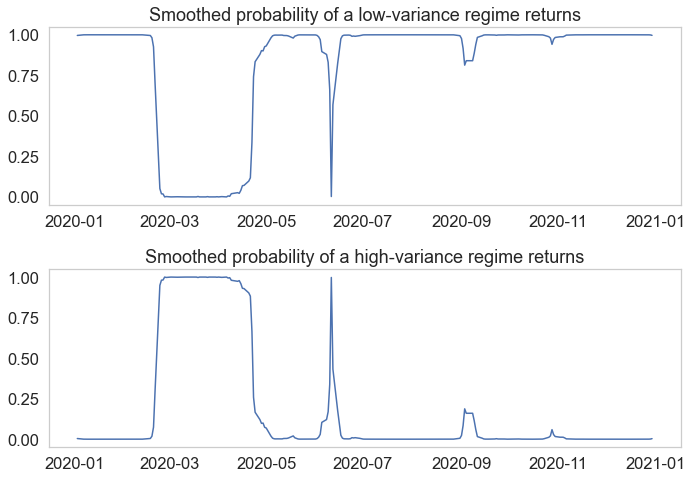

In [21]:
fig, axes = plt.subplots(2, figsize=(10,7))
ax = axes[0]
ax.plot(res_kns.smoothed_marginal_probabilities[0])
ax.grid(False)
ax.set(title='Smoothed probability of a low-variance regime returns')
ax = axes[1]
ax.plot(res_kns.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a high-variance regime returns')
fig.tight_layout()
ax.grid(False)

In [22]:
low_var = list(res_kns.smoothed_marginal_probabilities[0])
high_var = list(res_kns.smoothed_marginal_probabilities[1])

regime_list = []
for i in range(0, len(low_var)):
    if low_var[i] > high_var[i]:
        regime_list.append(0)
    else:
        regime_list.append(1)

In [23]:
regime_df = pd.DataFrame()
regime_df['regimes'] = regime_list

Text(0.5, 0.98, 'Historical SP500 regimes')

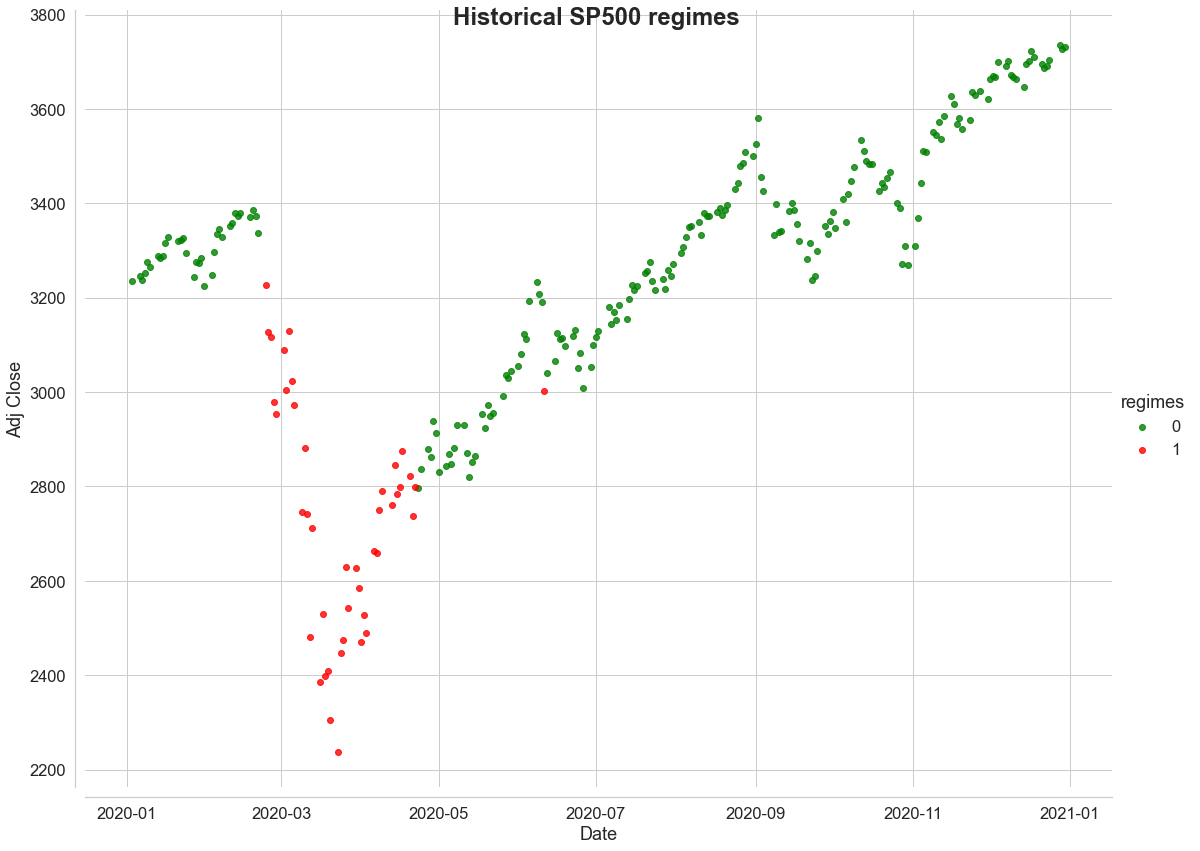

In [24]:
sns.set(font_scale=1.5)
df = df.iloc[len(df)-len(regime_list):]
regimes = (pd.DataFrame(regime_list, columns=['regimes'], index=df.index)
          .join(df, how='inner')
          .reset_index(drop=False)
          .rename(columns={'index':'Date'}))
regimes.head()

import warnings
warnings.filterwarnings("ignore")
colors = 'green', 'red', 'yellow'
sns.set_style("whitegrid")
order = [0, 1]
fg = sns.FacetGrid(data=regimes, hue='regimes', hue_order=order,
                   palette=colors, aspect=1.31, height=12)
fg.map(plt.scatter, 'Date', "Adj Close", alpha=0.8).add_legend()
sns.despine(offset=10)
fg.fig.suptitle('Historical SP500 regimes', fontsize=24, fontweight='demi')

In [25]:
ml_df = yf.download('^GSPC', start="2017-01-01", end="2020-12-31", interval="1d")

# price and volume returns
for i in [1, 2, 3, 5, 7, 14, 21]:
    ml_df[f'Close_{i}_Value'] = ml_df['Adj Close'].pct_change(i)
    ml_df[f'Volume_{i}_Value'] = ml_df['Volume'].pct_change(i)
ml_df.dropna(inplace=True)

# probabilities
low_var_prob = list(res_kns.smoothed_marginal_probabilities[0])
high_var_prob = list(res_kns.smoothed_marginal_probabilities[1])
ml_df['Low_Var_Prob'] = low_var_prob[len(low_var_prob)-len(ml_df):] # adjust length
ml_df['High_Var_Prob'] = high_var_prob[len(high_var_prob)-len(ml_df):]

# volatility     
for i in [3, 7, 14, 21]:
    ml_df[f'Volt_{i}_Value'] = np.log(1 + ml_df['Close_1_Value']).rolling(i).std()
    
ml_df.dropna(inplace=True)

# states
ml_df['regimes'] = regime_list[len(regimes)-len(ml_df):] # adjust length

ml_df.head()

[*********************100%***********************]  1 of 1 completed


ValueError: Length of values (251) does not match length of index (985)

In [ ]:
ml_df['regimes'] = ml_df['regimes'].shift(-1) 
ml_df.dropna(inplace=True)
ml_df

In [ ]:
rf_df = ml_df.copy()
labels = rf_df.pop('regimes') # get target states into a variable
labels = labels.astype('int')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(rf_df, labels, test_size=0.2)
Counter(y_train)

In [ ]:
# undersample our low_variance regime examples
under_sampler = RandomUnderSampler(random_state=40)
X_rs, y_rs = under_sampler.fit_resample(X_train, y_train)

In [ ]:
Counter(y_rs)


In [ ]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_rs, y_rs)

In [ ]:
y_pred = rf.predict(X_test)
y_prob_pred = rf.predict_proba(X_test)

In [ ]:
acc_score = accuracy_score(y_test, y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('accuracy_score=', acc_score,'roc_auc=', roc_auc, 'FPR=', false_positive_rate[1],  'TPR=', true_positive_rate[1])

In [ ]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 110, 120, 130, 140, 150, 160]
train_results = []
test_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator)
    rf.fit(X_rs, y_rs)
    train_pred = rf.predict(X_rs)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_rs, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.grid(False)
plt.show()

In [ ]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_rs, y_rs)

In [ ]:
results = permutation_importance(rf, X_rs, y_rs, scoring='accuracy')


In [ ]:
importance = results.importances_mean

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.grid(False)
plt.show()

In [ ]:
ml_df.columns[25]


### Regime Detection and Analysis of FTSE 100

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
import pandas as pd
import random

import numpy as np
import scipy.stats as scs

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from collections import Counter, deque
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
df = yf.download('^FTSE', start="2020-01-01", end="2020-12-01", interval="1d")
df.head()

In [ ]:
plt.title(f'FTSE 100 Price History')
plt.plot(
    list(i for i in df.index),
    list(i[4] for i in df.values))
plt.grid(False)


In [ ]:
df['r-1'] = df['Adj Close'].pct_change().dropna()

ex_ret = df['r-1']
ex_ret.plot(title='FTSE 100 Excess returns', figsize=(12, 3), grid=False)

In [ ]:
# Fit the model
mod_kns = sm.tsa.MarkovRegression(ex_ret.dropna(), k_regimes=2, trend='n', switching_variance=True)
res_kns = mod_kns.fit()
res_kns.summary()

In [ ]:
res_kns.smoothed_marginal_probabilities.head()


In [ ]:
print(res_kns.smoothed_marginal_probabilities.head())


In [ ]:
fig, axes = plt.subplots(2, figsize=(10,7))
ax = axes[0]
ax.plot(res_kns.smoothed_marginal_probabilities[0])
ax.grid(False)
ax.set(title='Smoothed probability of a low-variance regime returns')
ax = axes[1]
ax.plot(res_kns.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a high-variance regime returns')
fig.tight_layout()
ax.grid(False)

In [ ]:
low_var = list(res_kns.smoothed_marginal_probabilities[0])
high_var = list(res_kns.smoothed_marginal_probabilities[1])

regime_list = []
for i in range(0, len(low_var)):
    if low_var[i] > high_var[i]:
        regime_list.append(0)
    else:
        regime_list.append(1)

In [ ]:
regime_df = pd.DataFrame()
regime_df['regimes'] = regime_list

In [ ]:
sns.set(font_scale=1.5)
df = df.iloc[len(df)-len(regime_list):]
regimes = (pd.DataFrame(regime_list, columns=['regimes'], index=df.index)
          .join(df, how='inner')
          .reset_index(drop=False)
          .rename(columns={'index':'Date'}))
regimes.head()

import warnings
warnings.filterwarnings("ignore")
colors = 'green', 'red', 'yellow'
sns.set_style("whitegrid")
order = [0, 1]
fg = sns.FacetGrid(data=regimes, hue='regimes', hue_order=order,
                   palette=colors, aspect=1.31, height=12)
fg.map(plt.scatter, 'Date', "Adj Close", alpha=0.8).add_legend()
sns.despine(offset=10)
fg.fig.suptitle('Historical FTSE 100 regimes', fontsize=24, fontweight='demi')

In [ ]:
ml_df = yf.download('^FTSE', start="2020-01-01", end="2020-12-31", interval="1d")

# price and volume returns
for i in [1, 2, 3, 5, 7, 14, 21]:
    ml_df[f'Close_{i}_Value'] = ml_df['Adj Close'].pct_change(i)
    ml_df[f'Volume_{i}_Value'] = ml_df['Volume'].pct_change(i)
ml_df.dropna(inplace=True)

# probabilities
low_var_prob = list(res_kns.smoothed_marginal_probabilities[0])
high_var_prob = list(res_kns.smoothed_marginal_probabilities[1])
ml_df['Low_Var_Prob'] = low_var_prob[len(low_var_prob)-len(ml_df):] # adjust length
ml_df['High_Var_Prob'] = high_var_prob[len(high_var_prob)-len(ml_df):]

# volatility     
for i in [3, 7, 14, 21]:
    ml_df[f'Volt_{i}_Value'] = np.log(1 + ml_df['Close_1_Value']).rolling(i).std()
    
ml_df.dropna(inplace=True)

# states
ml_df['regimes'] = regime_list[len(regimes)-len(ml_df):] # adjust length

ml_df.head()

In [ ]:
ml_df['regimes'] = ml_df['regimes'].shift(-1) 
ml_df.dropna(inplace=True)
ml_df

In [ ]:
rf_df = ml_df.copy()
labels = rf_df.pop('regimes') # get target states into a variable
labels = labels.astype('int')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(rf_df, labels, test_size=0.2)
Counter(y_train)

In [ ]:
# undersample our low_variance regime examples
under_sampler = RandomUnderSampler(random_state=40)
X_rs, y_rs = under_sampler.fit_resample(X_train, y_train)

In [ ]:
Counter(y_rs)

In [ ]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_rs, y_rs)

In [ ]:
y_pred = rf.predict(X_test)
y_prob_pred = rf.predict_proba(X_test)

In [ ]:
acc_score = accuracy_score(y_test, y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('accuracy_score=', acc_score,'roc_auc=', roc_auc, 'FPR=', false_positive_rate[1],  'TPR=', true_positive_rate[1])

In [ ]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 110, 120, 130, 140, 150, 160]
train_results = []
test_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator)
    rf.fit(X_rs, y_rs)
    train_pred = rf.predict(X_rs)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_rs, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.grid(False)
plt.show()

In [ ]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_rs, y_rs)

In [ ]:
results = permutation_importance(rf, X_rs, y_rs, scoring='accuracy')

In [ ]:
importance = results.importances_mean

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.grid(False)
plt.show()

In [ ]:
ml_df.columns[25]


### Regime Detection and Analysis of Gold

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
import pandas as pd
import random

import numpy as np
import scipy.stats as scs

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from collections import Counter, deque
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
df = yf.download('GC=F', start="2020-01-01", end="2020-12-01", interval="1d")
df.head()

In [ ]:
plt.title(f'Gold Price History')
plt.plot(
    list(i for i in df.index),
    list(i[4] for i in df.values))
plt.grid(False)


In [ ]:
df['r-1'] = df['Adj Close'].pct_change().dropna()

ex_ret = df['r-1']
ex_ret.plot(title='Gold Excess returns', figsize=(12, 3), grid=False)

In [ ]:
# Fit the model
mod_kns = sm.tsa.MarkovRegression(ex_ret.dropna(), k_regimes=2, trend='n', switching_variance=True)
res_kns = mod_kns.fit()
res_kns.summary()

In [ ]:
res_kns.smoothed_marginal_probabilities.head()

In [ ]:
print(res_kns.smoothed_marginal_probabilities.head())

In [ ]:
fig, axes = plt.subplots(2, figsize=(10,7))
ax = axes[0]
ax.plot(res_kns.smoothed_marginal_probabilities[0])
ax.grid(False)
ax.set(title='Smoothed probability of a low-variance regime returns')
ax = axes[1]
ax.plot(res_kns.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a high-variance regime returns')
fig.tight_layout()
ax.grid(False)

In [ ]:
low_var = list(res_kns.smoothed_marginal_probabilities[0])
high_var = list(res_kns.smoothed_marginal_probabilities[1])

regime_list = []
for i in range(0, len(low_var)):
    if low_var[i] > high_var[i]:
        regime_list.append(0)
    else:
        regime_list.append(1)

In [ ]:
regime_df = pd.DataFrame()
regime_df['regimes'] = regime_list

In [ ]:
sns.set(font_scale=1.5)
df = df.iloc[len(df)-len(regime_list):]
regimes = (pd.DataFrame(regime_list, columns=['regimes'], index=df.index)
          .join(df, how='inner')
          .reset_index(drop=False)
          .rename(columns={'index':'Date'}))
regimes.head()

import warnings
warnings.filterwarnings("ignore")
colors = 'green', 'red', 'yellow'
sns.set_style("whitegrid")
order = [0, 1]
fg = sns.FacetGrid(data=regimes, hue='regimes', hue_order=order,
                   palette=colors, aspect=1.31, height=12)
fg.map(plt.scatter, 'Date', "Adj Close", alpha=0.8).add_legend()
sns.despine(offset=10)
fg.fig.suptitle('Historical Gold regimes', fontsize=24, fontweight='demi')

In [ ]:
ml_df = yf.download('GC=F', start="2020-01-01", end="2020-12-31", interval="1d")

# price and volume returns
for i in [1, 2, 3, 5, 7, 14, 21]:
    ml_df[f'Close_{i}_Value'] = ml_df['Adj Close'].pct_change(i)
    ml_df[f'Volume_{i}_Value'] = ml_df['Volume'].pct_change(i)
ml_df.dropna(inplace=True)

# probabilities
low_var_prob = list(res_kns.smoothed_marginal_probabilities[0])
high_var_prob = list(res_kns.smoothed_marginal_probabilities[1])
ml_df['Low_Var_Prob'] = low_var_prob[len(low_var_prob)-len(ml_df):] # adjust length
ml_df['High_Var_Prob'] = high_var_prob[len(high_var_prob)-len(ml_df):]

# volatility     
for i in [3, 7, 14, 21]:
    ml_df[f'Volt_{i}_Value'] = np.log(1 + ml_df['Close_1_Value']).rolling(i).std()
    
ml_df.dropna(inplace=True)

# states
ml_df['regimes'] = regime_list[len(regimes)-len(ml_df):] # adjust length

ml_df.head()

#### Section 3

In [ ]:
# For data manipulation
!pip install yfinance
import numpy as np
import pandas as pd

# To fetch financial data
import yfinance as yf

# For visualisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-dark')

In [ ]:
start_date = pd.to_datetime('2017-01-01')
end_date = pd.to_datetime('2020-12-01')

df = yf.download(['^GSPC','GC=F'],start=start_date, end=end_date, interval="1d", auto_adjust=True)['Close']
print(df.tail())

In [ ]:
plt.figure()
ax = df['Covariance'].plot(figsize=(15,7))
plt.title('Covariance', size=16)
plt.xlabel('Date',size=15)
plt.ylabel('Covariance',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

plt.figure()
ax = df['Correlation'].plot(figsize=(15,7))
plt.title('Correlation', size=16)
plt.xlabel('Date',size=15)
plt.ylabel('Correlation',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Stationary and Non Stationary Time Series  

Stationary Time Series, it is the one where the mean and the variance are both constant over time. In other words, it is the one whose properties do not depend on the time at which the series is observed. Thus, the Time Series is a flat series without trend, with constant variance over time, a constant mean, a constant autocorrelation and no seasonality. This makes a Stationary Time Series easy to predict.

A Non-Stationary Time Series is one where either mean or variance or both are not constant over time. We can use the following tests to find out if our time series is non-stationary. 

Autocorrelation function (ACF) test
Partial autocorrelation function (PACF) test

Partial autocorrelation function (PACF) – In some cases, the effect of autocorrelation at smaller lags will have an influence on the estimate of autocorrelation at longer lags. For example, a strong lag one, can cause an autocorrelation with lag three. The Partial autocorrelation function (PACF) removes the effect of shorter lag autocorrelation from the correlation estimate at longer lags.

### Autocorrelation 

The Autocorrelation function test is mainly used for two reasons:

For detecting non-randomness in the data and for identifying the appropriate time series model for the particular dataset.

The Autocorrelation function checks for correlation between two different data points of a Time Series separated by a lag “h”

The ACF will check for correlation between points #1 and #2, #2 and #3 etc. Similarly, for lag 3, the ACF function will check between points #1 and #4, #2 and #5, #3 and #6 etc.

In [ ]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
import yfinance as yf
tesla = yf.download('^GSPC','2019-01-27', '2020-02-11')
plot_acf(tesla['Close'], lags=20)
pyplot.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(tesla['Close'], lags=20)
pyplot.show()